
  # Problem Set 4, Metrics 717, Spring 22

  Author: 

    name: Giselle Labrador Badia

    email: labradorbada@wisc.edu
    
  
  This file contains the main code to solve PS4.


In [296]:
# importing libraries
using Random, Plots, Printf

In [297]:
# including Primitives and functions of the model 
include("./ps4_model.jl");

### b) Compute model given parameters and N simulated individuals.

In [298]:
# from set of paramters computing remaining of the primitives of the model
θ = initialize([1.0, 1.0, 2, 1, 0.5, 0.5, 0.25])

Primitives
  π₁: Float64 1.0
  π₂: Float64 1.0
  μ₁: Float64 2.0
  μ₂: Float64 1.0
  σ₁: Float64 0.5
  σ₂: Float64 0.5
  ρ: Float64 0.25
  Σ: Array{Float64}((2, 2)) [0.25 0.0625; 0.0625 0.25]


In [299]:
# Given paramters, simulating N individuals
data = simulate(θ,n= 1000)
describe(data)

,variable,mean,min,median,max,nmissing,eltype
,Symbol,Float64,Real,Float64,Real,Int64,DataType
1,ind,500.5,1,500.5,1000,0,Int64
2,d,0.944,0,1.0,1,0,Int64
3,wage,8.17559,1.47855,7.2903,34.9914,0,Float64


### c) Find vector of parameters such that 60% of observations choose ocuppation 1


In [300]:
θ_vector = get_params_percent(0.6)
θ = initialize(θ_vector)

Primitives
  π₁: Float64 1.0
  π₂: Float64 1.0
  μ₁: Float64 1.2
  μ₂: Float64 1.0
  σ₁: Float64 0.5
  σ₂: Float64 0.951817
  ρ: Float64 0.5
  Σ: Array{Float64}((2, 2)) [0.25 0.23795425; 0.23795425 0.905955601489]


In [301]:
println("The fraction of the individuals who choose to work in industry 1 is ",mean(simulate(θ).d))

The fraction of the individuals who choose to work in industry 1 is 0.603


### d) Consistent estimator.

### e) Using c) as true population parameters, write a program to compute estimator in d) for only $\mu_1$ and $\rho$ parameters.

In [303]:
data =  simulate(θ,n= 10000)
estimates = simulated_method_moments(data, vcat(θ_vector[1:2], θ_vector[4:6]))


2-element Vector{Float64}:
  1.0009729072980804
 -0.5442478136576303

In [295]:
#testing
t = [1.0, 1.0, 1.2, 1, 0.5, 0.9, 0.5]
data =  simulate(initialize(t),n= 1000)
est = simulated_method_moments(data, vcat(t[1:2], t[4:6]))

2-element Vector{Float64}:
 1.2012625501407963
 0.5125503963447553

In [287]:
mean(data.d)


0.61

### f) Figures that show identification of true parameters

In [291]:
θ = initialize(t)
estimates = est
μs = (θ.μ₁-0.7):0.001:(θ.μ₁+0.7)
ρs = (θ.ρ-0.4):0.001:(θ.ρ+0.4)

ĝ = get_moments(data)
μobj= [simulated_method_moments_objective(vcat(t[1:2],x, t[4:7]), ĝ) for x in μs];
ρobj = [simulated_method_moments_objective(vcat(t[1:6],x), ĝ) for x in ρs];

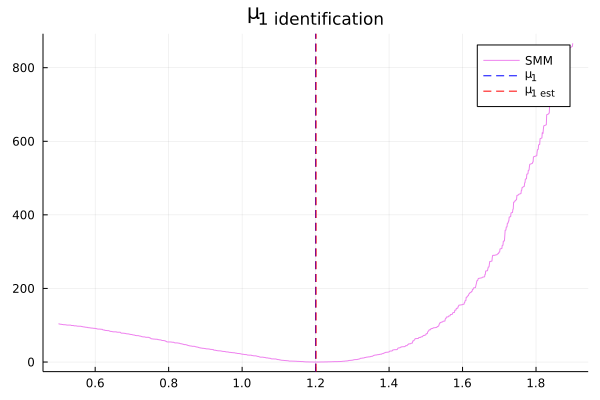

In [292]:
plot(μs, μobj, labels="SMM", title="\\mu_1 identification", color = "violet")
plot!([θ.μ₁], seriestype="vline", labels="\\mu_1 ", linestyle=:dash, color = "blue")
plot!([estimates[1]], seriestype="vline", labels="\\mu_1 est ", linestyle=:dash, color = "red")

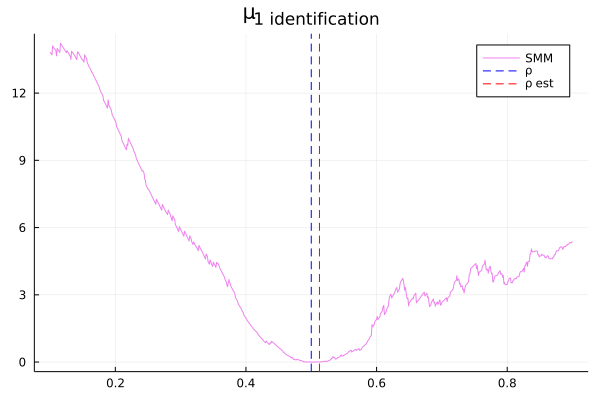

In [293]:
plot(ρs, ρobj, labels="SMM", title="\\mu_1 identification", color = "violet")
plot!([θ.ρ], seriestype="vline", labels="\\rho ", linestyle=:dash, color = "blue")
plot!([estimates[2]], seriestype="vline", labels="\\rho est ", linestyle=:dash, color = "red")

5-element Vector{Float64}:
  0.39
  6.771778559928895
  3.7681935537675293
 30.92340685077626
  3.9100286045794